# TF First Neural Network

## Import Libraries

In [1]:
import tensorflow as tf
import numpy as np

print(tf.version.VERSION)

2025-10-02 18:27:13.594031: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.20.0


## Dataset

In [2]:
# define some training data (xs as inputs and ys as outputs)

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [3]:
print(xs, xs.shape)
print(ys, ys.shape)

[-1.  0.  1.  2.  3.  4.] (6,)
[-3. -1.  1.  3.  5.  7.] (6,)


## Define Model (NN Arquitecture)

In [4]:
# define a neural network with one neuron
# for more information on TF functions see: https://www.tensorflow.org/api_docs

model = tf.keras.Sequential([tf.keras.layers.Dense( units=1, input_shape=[1])])

/home/leohf/machine_learning/ml_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-02 18:32:44.474276: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
model.summary() # w,b - two parameters to learn

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

**Default parameters' inicialization**
- kernel_initializer ('ws') => 'glorot_uniform' (Xavier)
- bias_initializer  ('bs') => 'zeros'

**Viewing initial weights (parameters)**

In [6]:
model.get_weights() # list of parameters

[array([[-0.43728805]], dtype=float32), array([0.], dtype=float32)]

In [7]:
print("wi = ", model.get_weights()[0][0][0])
print("b  = ", model.get_weights()[1][0])

wi =  -0.43728805
b  =  0.0


## Compile Model

In [8]:
# use stochastic gradient descent for optimization and
# the mean squared error loss function

model.compile(optimizer='sgd', loss='mean_squared_error')

In [10]:
model.save('my_first_model_no_training.h5')

In [12]:
print(model.predict(np.array([10.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[-4.3728805]]


Inspecting Model with [Netron](https://netron.app)

## Training

In [13]:
# fit the model to the data (aka train the model)

history = model.fit(xs, ys, epochs=500)

Epoch 1/500


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - loss: 24.3801
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 19.4685
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 15.5984
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 12.5478
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 10.1421
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 8.2439
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 6.7450
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 5.5604
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 4.6232
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step - loss: 3.8808
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 3.2917
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.8233
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 2.4500
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 2.1516
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1.9123
Epoch 16/500
1/1 ━━━━━━━

Inspect model

In [14]:
print("wi = ", model.get_weights()[0][0][0])
print("b  = ", model.get_weights()[1][0])

wi =  1.9970884
b  =  -0.9909731


In [15]:
# Saving the trained model
model.save('my_first_model_trained.h5')

## Test model

In [17]:
# Predict the output of a new data (Inference)

print(model.predict(np.array([10.0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[18.979912]]


In [ ]:
type(history.history) # dict_keys

dict

In [ ]:
history.history.keys() # dict_keys(['loss'])

dict_keys(['loss'])

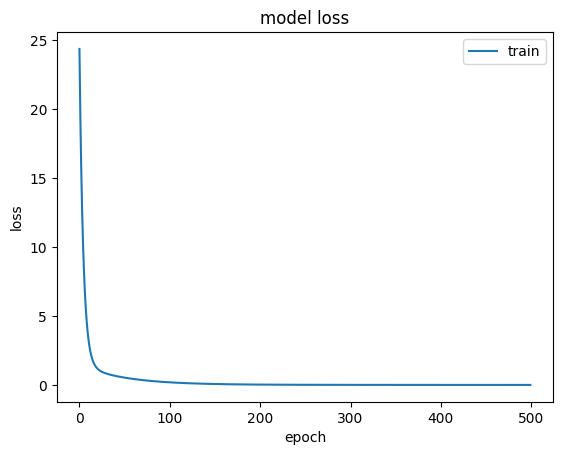

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()